# ProCS15 vs BMRB

In [1]:
from pyprocs15 import PyProCS15
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import pynmrstar

In [2]:
entry = pynmrstar.Entry.from_database(17769)

bmrb_cs = {}
bmrb_seq = {}

#loop = entry.get_loops_by_category('Atom_chem_shift')
    
elems = [cs.get_tag(['Seq_ID', 'Comp_ID', 'Atom_ID', 'Val']) for cs in entry.get_loops_by_category('Atom_chem_shift')]

for seq_id, res, atom, shift in map(tuple, elems[0]):
    seq_id = int(seq_id)
    shift = float(shift)
    
    if seq_id not in bmrb_cs:
        bmrb_cs[seq_id] = {}
        bmrb_seq[seq_id] = res

    bmrb_cs[seq_id][atom] = shift

pyprocs15 = PyProCS15('1UBQ_amber.pdb')
targets, shieldings = pyprocs15.calc_shieldings()

ca_procs = []
cb_procs = []
co_procs = []
n_procs = []
hn_procs = []
ha_procs = []

ca_bmrb = []
cb_bmrb = []
co_bmrb = []
n_bmrb = []
hn_bmrb = []
ha_bmrb = []

for target, shielding in zip(targets, shieldings):

    if shielding[0] < 1.0E-6:
        continue

    resid = target[2]

    ca_procs.append(shielding[0])
    if bmrb_seq[resid] != 'GLY':
        cb_procs.append(shielding[1])
    co_procs.append(shielding[2])
    n_procs.append(shielding[3])
    if bmrb_seq[resid] != 'PRO':
        hn_procs.append(shielding[4])
    ha_procs.append(shielding[5])
    
    ca_bmrb.append(bmrb_cs[resid]['CA'])
    if bmrb_seq[resid] != 'GLY':
        cb_bmrb.append(bmrb_cs[resid]['CB'])
    co_bmrb.append(bmrb_cs[resid]['C'])
    n_bmrb.append(bmrb_cs[resid]['N'])
    if bmrb_seq[resid] != 'PRO':
        hn_bmrb.append(bmrb_cs[resid]['H'])
    
    if 'HA' in bmrb_cs[resid]:
        ha_bmrb.append(bmrb_cs[resid]['HA'])
    else:
        ha_bmrb.append(bmrb_cs[resid]['HA2'])



C:\Users\hajime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\Bio\PDB\PDBParser.py:384: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1349
  warnings.warn(
Atom not found in 134-th residue, this and the adjacent residues will be ignored
Atom not found in 134-th residue, this and the adjacent residues will be ignored
Some atoms are missing.
Some atoms are missing.
Some atoms are missing.
Some atoms are missing.


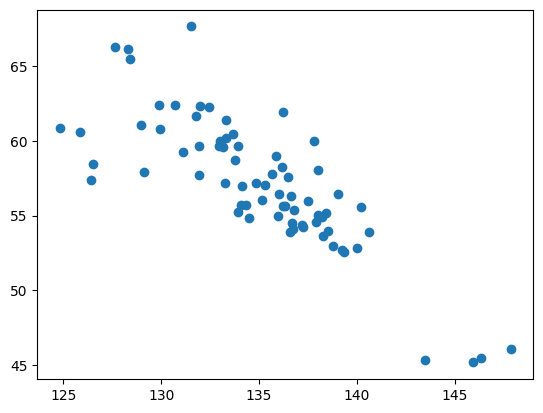

In [3]:
plt.scatter(ca_procs, ca_bmrb)
plt.show()

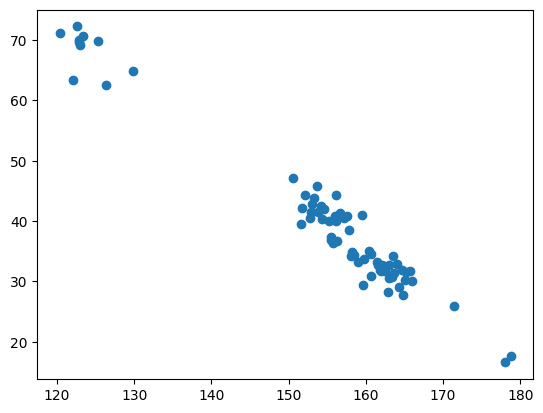

In [4]:
plt.scatter(cb_procs, cb_bmrb)
plt.show()

In [5]:
from numpy.polynomial import Polynomial

In [9]:
ca_reg = np.polyfit(ca_procs, ca_bmrb, 1)

In [10]:
print(ca_reg)

[ -0.79557303 164.5950633 ]


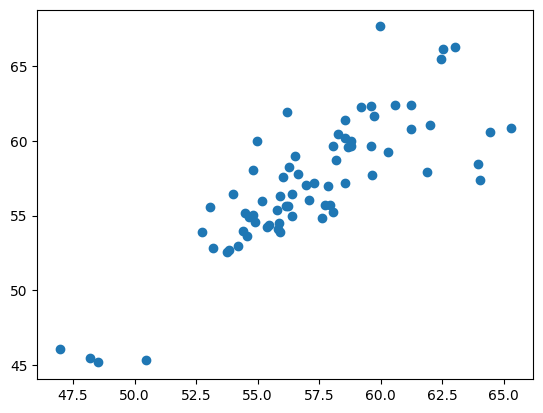

In [11]:
plt.scatter(ca_reg[0]*np.array(ca_procs) + ca_reg[1], np.array(ca_bmrb))
plt.show()

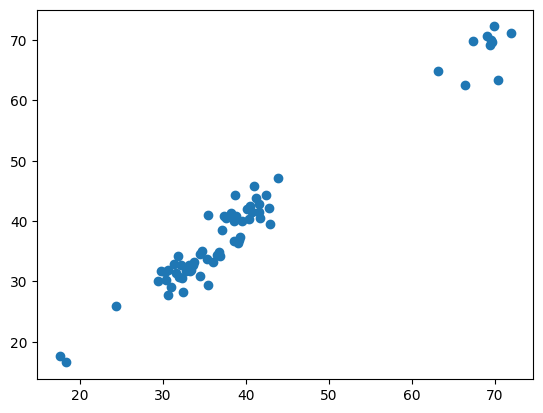

In [12]:
cb_reg = np.polyfit(cb_procs, cb_bmrb, 1)

plt.scatter(cb_reg[0]*np.array(cb_procs) + cb_reg[1], np.array(cb_bmrb))
plt.show()

In [13]:
co_reg = np.polyfit(co_procs, co_bmrb, 1)
n_reg = np.polyfit(n_procs, n_bmrb, 1)
hn_reg = np.polyfit(hn_procs, hn_bmrb, 1)
ha_reg = np.polyfit(ha_procs, ha_bmrb, 1)


In [14]:
ca_procs = np.array(ca_procs)
cb_procs = np.array(cb_procs)
co_procs = np.array(co_procs)
n_procs = np.array(n_procs)
hn_procs = np.array(hn_procs)
ha_procs = np.array(ha_procs)

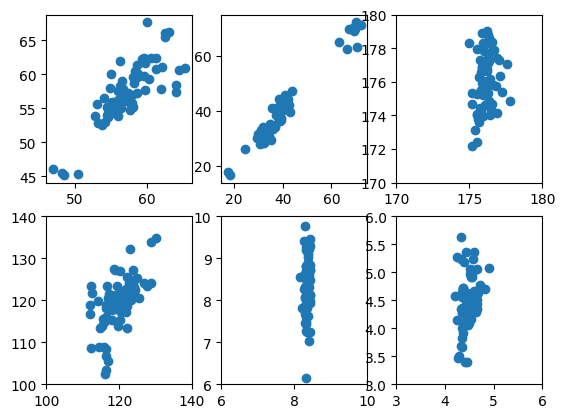

In [18]:
fig = plt.figure()

ax_ca = fig.add_subplot(231)
ax_cb = fig.add_subplot(232)
ax_co = fig.add_subplot(233)
ax_n = fig.add_subplot(234)
ax_hn = fig.add_subplot(235)
ax_ha = fig.add_subplot(236)

ax_ca.scatter(ca_reg[0]*ca_procs + ca_reg[1], ca_bmrb)
ax_cb.scatter(cb_reg[0]*cb_procs + cb_reg[1], cb_bmrb)
ax_co.scatter(co_reg[0]*co_procs + co_reg[1], co_bmrb)
ax_n.scatter(n_reg[0]*n_procs + n_reg[1], n_bmrb)
ax_hn.scatter(hn_reg[0]*hn_procs + hn_reg[1], hn_bmrb)
ax_ha.scatter(ha_reg[0]*ha_procs + ha_reg[1], ha_bmrb)

ax_co.set_xlim(170, 180)
ax_co.set_ylim(170, 180)
ax_n.set_xlim(100, 140)
ax_n.set_ylim(100, 140)
ax_hn.set_xlim(6, 10)
ax_hn.set_ylim(6, 10)
ax_ha.set_xlim(3, 6)
ax_ha.set_ylim(3, 6)

plt.show()